# TFM.

# Reducción de dimensiones mediante PCA

### Secciones

- PCA

In [2]:
import pyodbc

server = 'XXX' 
database = 'bioe' 
username = 'bioe' 
password = 'XXX' 
trusted = 'yes;' 

cnxn = pyodbc.connect('Driver={SQL Server};SERVER='+server+';DATABASE='+database+';ENCRYPT=no;'+username+';PWD='+ password)
cursor = cnxn.cursor()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


**PCA**

   dG_S  CP_BFKV  CP_BL  CP_BT  CP_GKS  CP_HLPL  CP_MJPL  CP_MJ3h  CP_MJ2h  \
0     1  -0.8654 -6.506  -5.48    -8.0    -28.6   -140.8    -2.96  -184.80   
1     1  -2.3756 -6.130  -7.74    -2.4    -34.0   -178.0   -11.50  -232.92   
2     1  -1.0114 -8.650  -4.96   -14.0    -34.2   -196.2     2.36  -158.48   
3     0   1.1344 -2.076  -3.98    -4.0    -12.0   -122.4    -2.90  -141.98   
4     0   1.5450 -4.558   2.74   -10.0    -26.8   -191.2     4.64  -155.10   

   CP_MJ1  ...  AP_PISA  FIREDOCK  FIREDOCK_AB  FIREDOCK_EI    CP_PIE  \
0  145.72  ...  -0.2445    -58.02       -71.00       -25.76  1.138510   
1  147.22  ...  -0.4878    -88.88       -96.94       -62.16  1.450095   
2  150.20  ...  -0.0288    -36.54       -67.22        -3.33  1.475723   
3  114.32  ...  -0.2250    -42.73       -47.67       -29.09  0.776228   
4  147.08  ...  -0.2936    -45.19       -67.13        -4.81  1.071730   

    CP_DDG_U   CP_DDG_W   AP_DDG_U   AP_DDG_W      DDG_V  
0  -4.560318  -3.938181  -2.88975

C:\Users\coept\AppData\Local\Temp\ipykernel_2748\3020008219.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dataframe = pd.read_sql_query(query, cnxn)


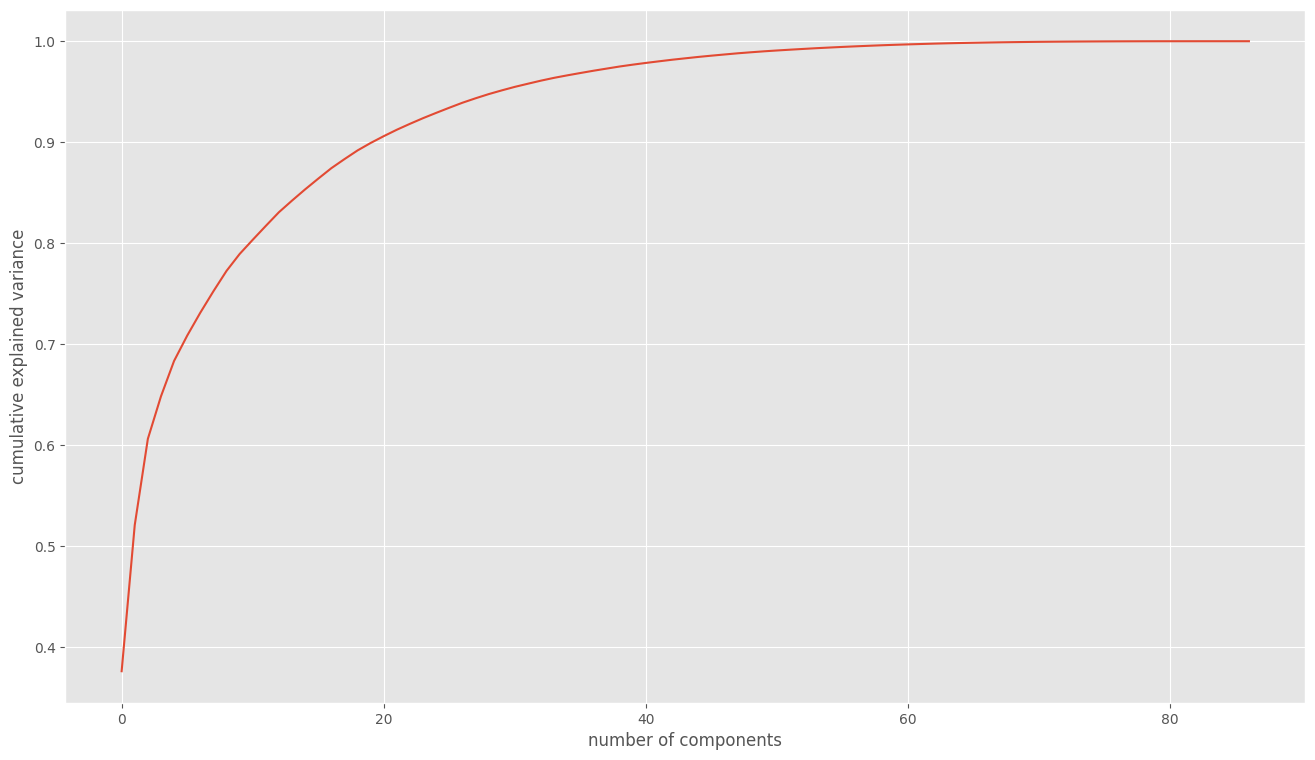

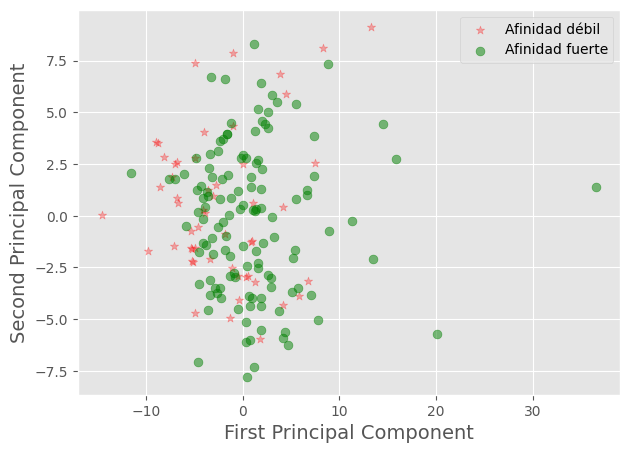

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
 
#cargamos los datos de entrada
query = "SELECT dG_S, CP_BFKV,CP_BL,CP_BT,CP_GKS,CP_HLPL,CP_MJPL,CP_MJ3h,CP_MJ2h,CP_MJ1,CP_MJ2,CP_MSBM,CP_MS,CP_Qa,CP_Qm,CP_Qp" + \
  ",CP_RO,CP_SKOb,CP_SKOa,CP_SJKG,CP_TD,CP_TEl,CP_TEs,CP_TS,CP_VD,CP_SKOIP,AP_DCOMPLEX,AP_dDFIRE,AP_DFIRE2,CP_RMFCEN1" + \
  ",CP_RMFCEN2,CP_RMFCA,CP_TB,CP_TSC,AP_T1,AP_T2,AP_DOPE,AP_DOPE_HR,AP_ACE,INSIDE,HBOND,PI_PI,CAT_PI,ALIPH,ZRANK,ZRANK2" + \
  ",ROT_S,TRANS_S,NIPacking,NSC,FA_ATR,FA_REP,LK_SOLV,FA_PP,CG_VDW,CG_PP,CG_ENV,CG_BETA,HBOND2,AA_PROP,ROSETTADOCK,NHB" + \
  ",ELE,DESOLV,VDW,PYDOCK_TOT,ODA,PROPNSTS,SIPPER,AP_OPUS_PSP,AP_GEOMETRIC,AP_DARS,AP_URS,AP_MPS,AP_W1,CP_D1,AP_calRW" + \
  ",AP_calRWp,AP_PISA,FIREDOCK,FIREDOCK_AB,FIREDOCK_EI,CP_PIE,CP_DDG_U,CP_DDG_W,AP_DDG_U,AP_DDG_W,DDG_V FROM [bioe].[TFM].[tfm_NNaN0_S] ();"

dataframe = pd.read_sql_query(query, cnxn)
print(dataframe.head(5))

#normalizamos los datos
scaler=StandardScaler()
df = dataframe.drop(columns=["dG_S"]) # quito la variable dependiente "Y"
scaler.fit(df) # calculo la media para poder hacer la transformacion
X_scaled=scaler.transform(df) # Ahora si, escalo los datos y los normalizo
 
#Instanciamos objeto PCA y aplicamos
pca=PCA(n_components=87) # Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
pca.fit(X_scaled) # obtener los componentes principales
X_pca=pca.transform(X_scaled) # convertimos nuestros datos con las nuevas dimensiones de PCA
 
print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:5]))
#Vemos que con 5 componentes tenemos algo mas del 85% de varianza explicada
 
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
 
#graficamos en 2 Dimensiones, tomando los 2 primeros componentes principales
Xax=X_pca[:,0]
Yax=X_pca[:,1]
labels=dataframe["dG_S"].values
cdict={0:'red',1:'green'}
labl={0:'Afinidad débil',1:'Afinidad fuerte'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],label=labl[l],s=40,marker=marker[l],alpha=alpha[l])
 
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()
